In [ ]:
!pip3 install sklearn
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install yfinance
!pip3 install tensorflow

In [2]:
import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


%matplotlib inline

/Users/ethanhuang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2024-04-10 20:22:27.998568: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = yf.download('^GSPC', period = '5y', interval = '1d')

[*********************100%%**********************]  1 of 1 completed


1258


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000
2019-04-16,2912.260010,2916.060059,2900.709961,2907.060059,2907.060059,3403120000
2019-04-17,2916.040039,2918.000000,2895.449951,2900.449951,2900.449951,3648100000


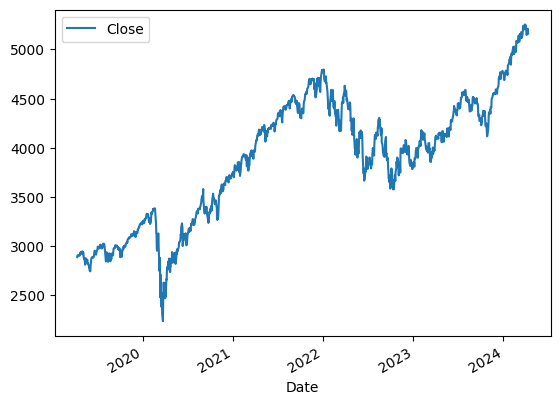

In [4]:
data.plot.line(y= "Close", use_index=True)
print(len(data))
data.head()


In [5]:
train_dataset = data.iloc[:1000, 4]
train_dataset.head()

Date
2019-04-11    2888.320068
2019-04-12    2907.409912
2019-04-15    2905.580078
2019-04-16    2907.060059
2019-04-17    2900.449951
Name: Adj Close, dtype: float64

In [6]:
test_dataset = data.iloc[1000:, 4]
test_dataset.head()

Date
2023-03-31    4109.310059
2023-04-03    4124.509766
2023-04-04    4100.600098
2023-04-05    4090.379883
2023-04-06    4105.020020
Name: Adj Close, dtype: float64

In [7]:
train_dataset_reshaped = train_dataset.values.reshape(-1, 1)

sc =  MinMaxScaler(feature_range=(0, 1))
train_dataset_scaled = sc.fit_transform(train_dataset_reshaped)
print(train_dataset_scaled)

[[0.25434913]
 [0.26180855]
 [0.26109354]
 [0.26167184]
 [0.25908892]
 [0.2608786 ]
 [0.26202739]
 [0.27207364]
 [0.26956113]
 [0.26913908]
 [0.27449629]
 [0.27572722]
 [0.27682135]
 [0.26818567]
 [0.26575911]
 [0.27674704]
 [0.27160085]
 [0.25268061]
 [0.25087137]
 [0.24747184]
 [0.25164506]
 [0.22447607]
 [0.23328357]
 [0.23975055]
 [0.24966009]
 [0.24309933]
 [0.23555778]
 [0.2449867 ]
 [0.24182547]
 [0.22852813]
 [0.23002084]
 [0.22077164]
 [0.2132028 ]
 [0.21548484]
 [0.2011051 ]
 [0.19813143]
 [0.22111555]
 [0.23005594]
 [0.23683164]
 [0.24849566]
 [0.2537278 ]
 [0.25333314]
 [0.25103555]
 [0.25564636]
 [0.25382549]
 [0.25487659]
 [0.26584897]
 [0.26925242]
 [0.28008408]
 [0.27863049]
 [0.2766338 ]
 [0.26570435]
 [0.26429769]
 [0.26865064]
 [0.27523096]
 [0.28405029]
 [0.287442  ]
 [0.2963551 ]
 [0.29424106]
 [0.28859079]
 [0.29002873]
 [0.29528053]
 [0.29795322]
 [0.3033691 ]
 [0.30357621]
 [0.29956708]
 [0.29190046]
 [0.29607768]
 [0.28884875]
 [0.29213886]
 [0.30012583]
 [0.30

In [23]:
x_train = []
y_train = []
timestep = 5
for i in range (timestep, len(train_dataset_scaled)):
    x_train.append(train_dataset_scaled[i-timestep:i, 0])
    y_train.append(train_dataset_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print (x_train)
print (y_train)

[[[0.25434913]
  [0.26180855]
  [0.26109354]
  [0.26167184]
  [0.25908892]]

 [[0.26180855]
  [0.26109354]
  [0.26167184]
  [0.25908892]
  [0.2608786 ]]

 [[0.26109354]
  [0.26167184]
  [0.25908892]
  [0.2608786 ]
  [0.26202739]]

 ...

 [[0.68986312]
  [0.66411243]
  [0.66870378]
  [0.67740586]
  [0.6799614 ]]

 [[0.66411243]
  [0.66870378]
  [0.67740586]
  [0.6799614 ]
  [0.67751528]]

 [[0.66870378]
  [0.67740586]
  [0.6799614 ]
  [0.67751528]
  [0.69960848]]]
[0.2608786  0.26202739 0.27207364 0.26956113 0.26913908 0.27449629
 0.27572722 0.27682135 0.26818567 0.26575911 0.27674704 0.27160085
 0.25268061 0.25087137 0.24747184 0.25164506 0.22447607 0.23328357
 0.23975055 0.24966009 0.24309933 0.23555778 0.2449867  0.24182547
 0.22852813 0.23002084 0.22077164 0.2132028  0.21548484 0.2011051
 0.19813143 0.22111555 0.23005594 0.23683164 0.24849566 0.2537278
 0.25333314 0.25103555 0.25564636 0.25382549 0.25487659 0.26584897
 0.26925242 0.28008408 0.27863049 0.2766338  0.26570435 0.2642976

In [24]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,batch_size=32)

/Users/ethanhuang/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 5, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2380
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0233
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0077
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0071
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0055
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0059
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0053
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0042
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - lo

In [25]:
model.save("stock_prediction_v2.keras")
#60 timestep
#0.0018 loss


In [95]:
model.save("stock_prediction_v1.keras")
#5 timestep
#0.0022 loss

In [18]:
model = tf.keras.models.load_model("stock_prediction_v1.keras")

In [31]:
model = tf.keras.models.load_model("stock_prediction_v2.keras")

In [27]:
real_stock_price = test_dataset.values
print(real_stock_price)

[4109.31005859 4124.50976562 4100.60009766 4090.37988281 4105.02001953
 4109.10986328 4108.93994141 4091.94995117 4146.22021484 4137.64013672
 4151.31982422 4154.87011719 4154.52001953 4129.79003906 4133.52001953
 4137.04003906 4071.62988281 4055.98999023 4135.35009766 4169.47998047
 4167.87011719 4119.58007812 4090.75       4061.2199707  4136.25
 4138.12011719 4119.16992188 4137.64013672 4130.62011719 4124.08007812
 4136.27978516 4109.89990234 4158.77001953 4198.04980469 4191.97998047
 4192.62988281 4145.58007812 4115.24023438 4151.27978516 4205.45019531
 4205.52001953 4179.83007812 4221.02001953 4282.37011719 4273.79003906
 4283.85009766 4267.52001953 4293.93017578 4298.85986328 4338.93017578
 4369.00976562 4372.58984375 4425.83984375 4409.58984375 4388.70996094
 4365.68994141 4381.89013672 4348.33007812 4328.81982422 4378.41015625
 4376.85986328 4396.43994141 4450.37988281 4455.58984375 4446.81982422
 4411.58984375 4398.95019531 4409.52978516 4439.25976562 4472.16015625
 4510.040039

In [32]:
dataset_total = pd.concat((train_dataset, test_dataset), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 5:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(5, len(inputs)):
    x_test.append(inputs[i-5:i, 0])
    

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


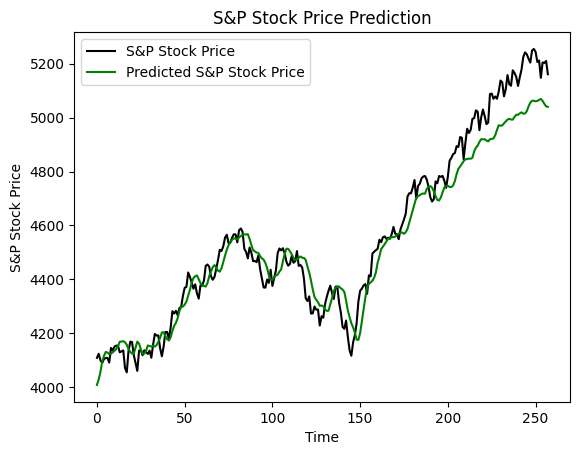

In [33]:
plt.plot(real_stock_price, color = 'black', label = 'S&P Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted S&P Stock Price')
plt.title('S&P Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()